## Deep Learning Model for Object Detection.

### Shrinivas Shetty

In [1]:
# Loading dependencies.
import os

# Data pre-processing libraries.
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Machine learning modelling libraries.
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation, Flatten, Dropout, Dense
from matplotlib import pyplot as plt

Using TensorFlow backend.


#### Accessing data files.

In [2]:
cwd = os.getcwd()
label_data = []
for file in os.listdir(cwd):
    if file.endswith(".txt"):
        with open("labels.txt") as file:
            for line in file:
                data_line = [l.strip() for l in line.split(' ')]
                label_data.append(data_line)

#### Processing Image files.

In [3]:
X = []
Y = []
for l in label_data:
    img = cv2.imread(l[0])
    resized_image = cv2.resize(img, (64, 64))
    X.append(resized_image.tolist())
    Y.append([float(l[1]), float(l[2])])

In [4]:
X = np.asarray(X)
Y = np.asarray(Y)
X.shape

(129, 64, 64, 3)

#### Rescaling pixel values between 0 and 1.

In [5]:
X = np.interp(X, (X.min(), X.max()), (0, 1))

#### Splitting data into training and test sets.


In [6]:
(train_X, test_X, train_y, test_y) = train_test_split(X, Y, test_size=0.25, random_state=42)

#### Model input parameters.

In [7]:
height = X.shape[-2]
width = X.shape[-3]
depth = X.shape[-1]
inputShape = (height, width, depth)
inputShape

(64, 64, 3)

#### Deep Learning Architecture.

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))

model.add(Dense(128))
model.add(Activation("sigmoid"))

model.add(Dense(Y.shape[-1]))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

#### Compiling the model.

In [9]:
Batch_Size = 8
model.compile(loss="mse", optimizer='adam', metrics=["accuracy"])
model_history = model.fit(train_X, train_y, epochs=50, verbose=1, batch_size=Batch_Size, validation_data=(test_X, test_y))

Instructions for updating:
Use tf.cast instead.
Train on 96 samples, validate on 33 samples
Epoch 1/50
96/96 [==============================] - 4s 46ms/step - loss: 0.2288 - acc: 0.4479 - val_loss: 0.0897 - val_acc: 0.6667
Epoch 2/50
96/96 [==============================] - 3s 34ms/step - loss: 0.0607 - acc: 0.5833 - val_loss: 0.1271 - val_acc: 0.4545
Epoch 3/50
96/96 [==============================] - 3s 35ms/step - loss: 0.0440 - acc: 0.6562 - val_loss: 0.0888 - val_acc: 0.4545
Epoch 4/50
96/96 [==============================] - 3s 35ms/step - loss: 0.0367 - acc: 0.7292 - val_loss: 0.0982 - val_acc: 0.5455
Epoch 5/50
96/96 [==============================] - 3s 34ms/step - loss: 0.0321 - acc: 0.7500 - val_loss: 0.0809 - val_acc: 0.5455
Epoch 6/50
96/96 [==============================] - 3s 34ms/step - loss: 0.0321 - acc: 0.7396 - val_loss: 0.0748 - val_acc: 0.5455
Epoch 7/50
96/96 [==============================] - 3s 34ms/step - loss: 0.0217 - acc: 0.8229 - val_loss: 0.0725 - val_acc

#### Saving the model.

In [10]:
model.save('3Conv_2FFN_8_Batch_Model.h5')


#### Visualizing learning using loss.

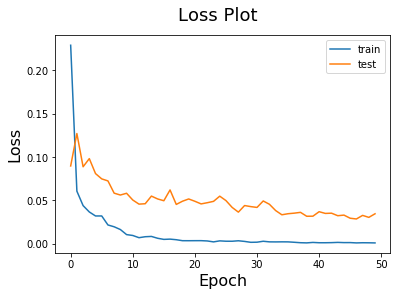

In [11]:
fig = plt.figure()
fig.suptitle('Loss Plot', fontsize=18)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.savefig('Loss_Plot.jpg')
plt.show()

#### Visualizing learning using accuracy.

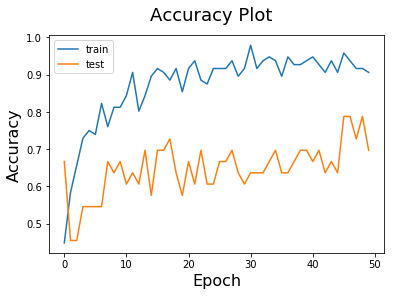

In [12]:
fig = plt.figure()
fig.suptitle('Accuracy Plot', fontsize=18)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_history.history['acc'], label='train')
plt.plot(model_history.history['val_acc'], label='test')
plt.legend()
plt.savefig('Acc_Plot.jpg')
plt.show()

#### Making prediction on test dataset.

In [13]:
pred_y = model.predict(test_X)
pred_y[0:15]

array([[0.55150175, 0.22067493],
       [0.29712003, 0.2704817 ],
       [0.72261715, 0.6353834 ],
       [0.67026603, 0.54248863],
       [0.29404116, 0.5330085 ],
       [0.16151528, 0.29914117],
       [0.1534795 , 0.85679793],
       [0.23665126, 0.3431362 ],
       [0.51415527, 0.6263393 ],
       [0.6641402 , 0.252468  ],
       [0.47650367, 0.42559803],
       [0.8694171 , 0.6016264 ],
       [0.8064291 , 0.11322865],
       [0.7482157 , 0.14107792],
       [0.6467223 , 0.4917855 ]], dtype=float32)

#### Visualizing Error.

In [14]:
err = test_y - pred_y
err[0:15]

array([[-0.00860175,  0.06152507],
       [-0.02572003,  0.09151829],
       [ 0.11408285,  0.07931657],
       [-0.11106603,  0.03421137],
       [ 0.12225884,  0.08659148],
       [-0.06561528, -0.16414117],
       [ 0.1159205 , -0.02239793],
       [ 0.10214874,  0.10166381],
       [-0.17945527, -0.54963932],
       [-0.08044022, -0.04076799],
       [-0.02140367,  0.20020197],
       [-0.08981707,  0.1437736 ],
       [ 0.00787091,  0.14747135],
       [ 0.02318432,  0.18412208],
       [-0.27942232, -0.2064855 ]])